In [1]:
import pandas as pd
import numpy as np 

In [2]:
wine_white = pd.read_csv('/home/dm/Desktop/pryectos revisado/wine_quality/datamining/winequality-white.csv', delimiter=';')

wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Create a funtion to score wine quality whit words, and then use it to create a new column named score, score is from brilliant to horrible 

wine_white['score'] = np.where(wine_white['quality'] > 6, 'brilliant', np.where(wine_white['quality'] > 4, 'good', np.where(wine_white['quality'] > 3, 'common', 'bad')))
wine_white['score'] = np.where(wine_white['quality'] > 6, 'brilliant', np.where(wine_white['quality'] > 4, 'good', np.where(wine_white['quality'] > 3, 'common', 'bad')))

In [4]:
#Drop the quality column
wine_white = wine_white.drop(columns=['quality'])

In [5]:
wine_white.groupby('score').size()

score
bad            20
brilliant    1060
common        163
good         3655
dtype: int64

In [6]:
wine_white.groupby('score').size()

score
bad            20
brilliant    1060
common        163
good         3655
dtype: int64

In [7]:
from pycaret.classification import *

data_wine_white = setup(data = wine_white, target = 'score', session_id = 123)

,Description,Value
0,session_id,123
1,Target,score
2,Target Type,Multiclass
3,Label Encoded,"bad: 0, brilliant: 1, common: 2, good: 3"
4,Original Data,"(4898, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8302,0.8836,0.4107,0.8168,0.8096,0.5113,0.5351,0.0670
rf,Random Forest Classifier,0.8285,0.8718,0.4201,0.8154,0.8107,0.5141,0.5329,0.0870
catboost,CatBoost Classifier,0.8247,0.8556,0.4397,0.8117,0.8110,0.5189,0.5302,7.0620
lightgbm,Light Gradient Boosting Machine,0.8209,0.8530,0.4329,0.8058,0.8072,0.5106,0.5209,0.0580
xgboost,Extreme Gradient Boosting,0.8203,0.8515,0.4303,0.8066,0.8052,0.5019,0.5144,0.1460
gbc,Gradient Boosting Classifier,0.7827,0.8195,0.3964,0.7605,0.7636,0.3868,0.4007,0.2500
ridge,Ridge Classifier,0.7663,0.0000,0.3027,0.7207,0.7132,0.2336,0.2885,0.0030
dt,Decision Tree Classifier,0.7640,0.7153,0.4356,0.7667,0.7650,0.4251,0.4255,0.0050
lr,Logistic Regression,0.7564,0.7417,0.3172,0.7061,0.7115,0.2326,0.2682,0.4400
lda,Linear Discriminant Analysis,0.7535,0.7417,0.4056,0.7233,0.7255,0.2785,0.2968,0.0050


In [9]:
et_model = create_model("et")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8280,0.8868,0.3908,0.8284,0.8046,0.4929,0.5218
1,0.8280,0.8908,0.4395,0.8257,0.8156,0.5247,0.5353
2,0.8076,0.8512,0.4038,0.8015,0.7903,0.4599,0.4718
3,0.8105,0.8632,0.4002,0.7969,0.7906,0.4528,0.4730
4,0.8309,0.9006,0.4184,0.8200,0.8137,0.5180,0.5365
5,0.8338,0.8942,0.4420,0.8383,0.8105,0.5009,0.5484
6,0.8222,0.8577,0.3632,0.7908,0.7906,0.4623,0.5059
7,0.8542,0.9042,0.3989,0.8209,0.8299,0.5800,0.6070
8,0.8567,0.9164,0.4651,0.8527,0.8437,0.6049,0.6169


In [10]:
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

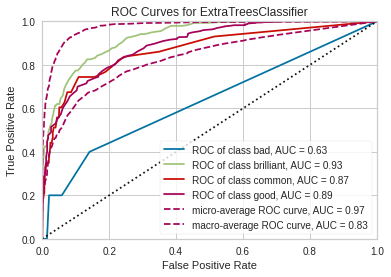

In [11]:
plot_model(et_model)

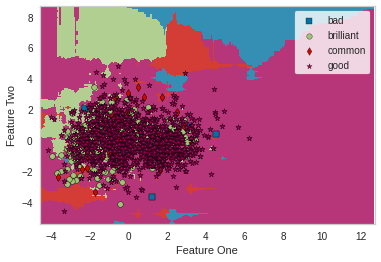

In [12]:
plot_model(et_model, plot = 'boundary')

In [13]:
predict_model(et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8578,0.8984,0.4393,0.8463,0.8456,0.5682,0.5780


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score,Label,Score
0,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,9.2,good,good,1.00
1,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,12.6,good,brilliant,0.56
2,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,12.6,brilliant,brilliant,0.80
3,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,brilliant,brilliant,1.00
4,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,9.3,good,good,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.1,0.22,0.40,1.850000,0.031,25.0,111.0,0.98966,3.03,0.30,11.8,brilliant,brilliant,1.00
1466,6.5,0.33,0.30,3.800000,0.036,34.0,88.0,0.99028,3.25,0.63,12.5,brilliant,brilliant,1.00
1467,6.9,0.19,0.32,7.900000,0.042,30.0,130.0,0.99456,3.40,0.39,10.5,good,good,0.73
1468,7.0,0.20,0.33,4.700000,0.030,25.0,76.0,0.99202,2.88,0.54,10.5,good,good,0.71


In [14]:
save_model(et_model, model_name = 'et_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='score',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [15]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000
